In [1]:
library(data.table)
library(ggplot2)
library(tidyverse)
library(forcats)
library(dplyr)
install.packages("zipcode")

Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
<U+221A> tibble  2.1.3     <U+221A> dplyr   0.8.3
<U+221A> tidyr   1.0.0     <U+221A> stringr 1.4.0
<U+221A> readr   1.3.1     <U+221A> forcats 0.4.0
<U+221A> purrr   0.3.3     
Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()
Installing package into 'C:/Users/Raczysko/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:

In [2]:
setwd("C:/Users/Raczysko/Desktop/ML in R/kaggle/Used Cars/data")
auto <-  read.csv2("autos.csv",
               sep = ",",
               header = T,
               encoding = "UTF - 8")

In [3]:
auto$offerType <- NULL
auto$name <- NULL
auto$seller <- NULL
auto$nrOfPictures <- NULL
auto$abtest <- NULL


In [4]:
auto

dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
2016-03-24 11:52:17,480,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,18300,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
2016-03-21 18:54:38,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,19348,2016-03-25 16:47:58
2016-04-04 23:42:13,14500,bus,2014,manuell,125,c_max,30000,8,benzin,ford,,2016-04-04 00:00:00,94505,2016-04-04 23:42:13
2016-03-17 10:53:50,999,kleinwagen,1998,manuell,101,golf,150000,0,,volkswagen,,2016-03-17 00:00:00,27472,2016-03-31 17:17:06


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0     1150     2950    10895     7200 99999999 

90% 
14000

99% 
35999.52

1% 
 0

5% 
200

10% 
500

Warning message:
"Removed 18318 rows containing non-finite values (stat_boxplot)."

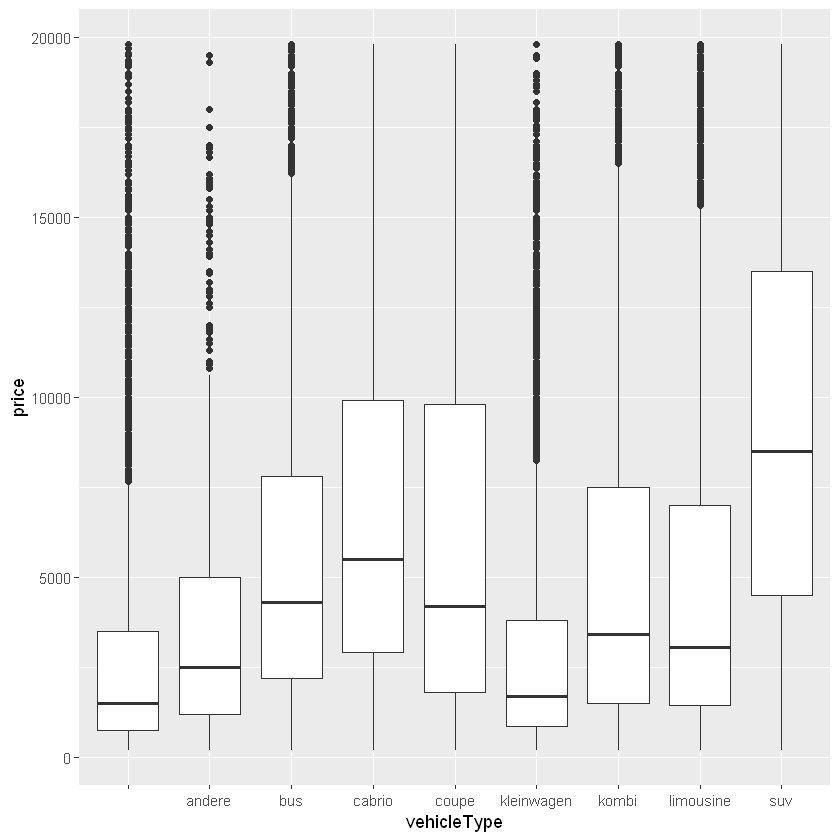

In [5]:
#Price cleaning by transformed it by correcting outliueres with "quantile()". We decided the best choice of limits will be bettwen 0.05 and 0.95.

summary(auto$price)
quantile(auto$price, 0.90)
quantile(auto$price, 0.99)
quantile(auto$price, 0.01)
quantile(auto$price, 0.05)
quantile(auto$price, 0.10)

ggplot(aes(x=vehicleType, y=price), data = auto) + 
  geom_boxplot() +
  ylim(quantile(auto$price, 0.05), quantile(auto$price, 0.95))


p1 <- ggplot(aes(x="price", y=price), data = auto) + 
  geom_boxplot()

p2 <- ggplot(aes(x="price", y=price), data = auto) + 
  geom_boxplot() +
  ylim(0, quantile(auto$price, 0.99))

p3 <- ggplot(aes(x="price", y=price), data = auto) + 
  geom_boxplot() +
  ylim(0, quantile(auto$price, 0.95))

p4 <- ggplot(aes(x="price", y=price), data = auto) + 
  geom_boxplot() +
  ylim(0, quantile(auto$price, 0.90))




Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Warning message:
"Removed 1894 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 9411 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 18856 rows containing non-finite values (stat_boxplot)."

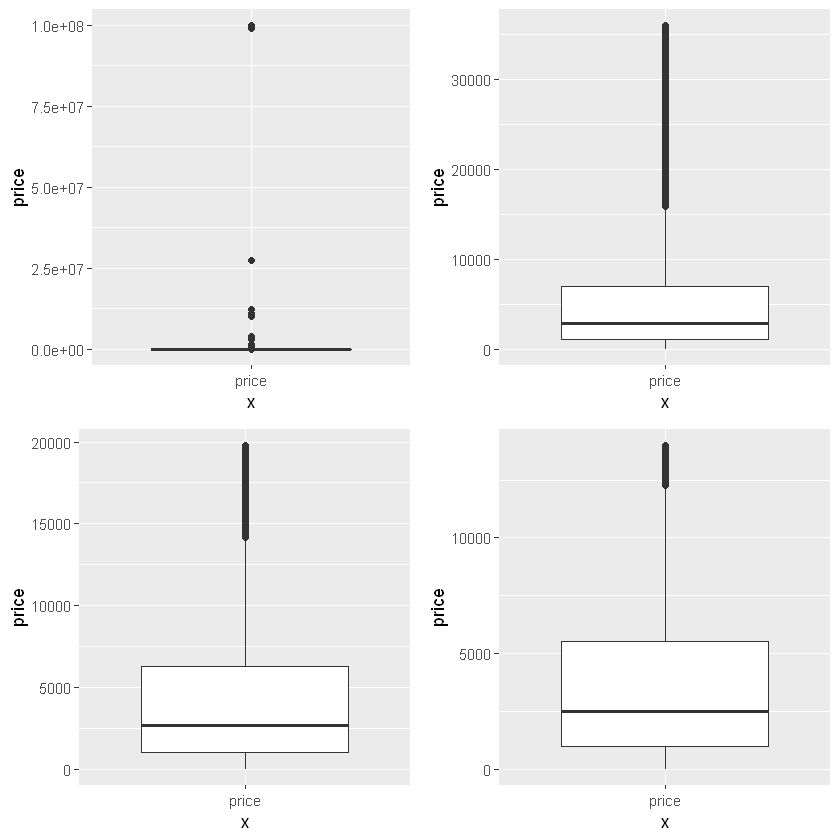

In [6]:
#Engine power cleaning again we use the limits bettwen 0.05 and 0.95 of total observations.
library(gridExtra)
grid.arrange(p1, p2, p3, p4, ncol = 2)

In [7]:
auto  <-  auto[(auto$price > quantile(auto$price, 0.05)) & (auto$price < quantile(auto$price, 0.95)),]

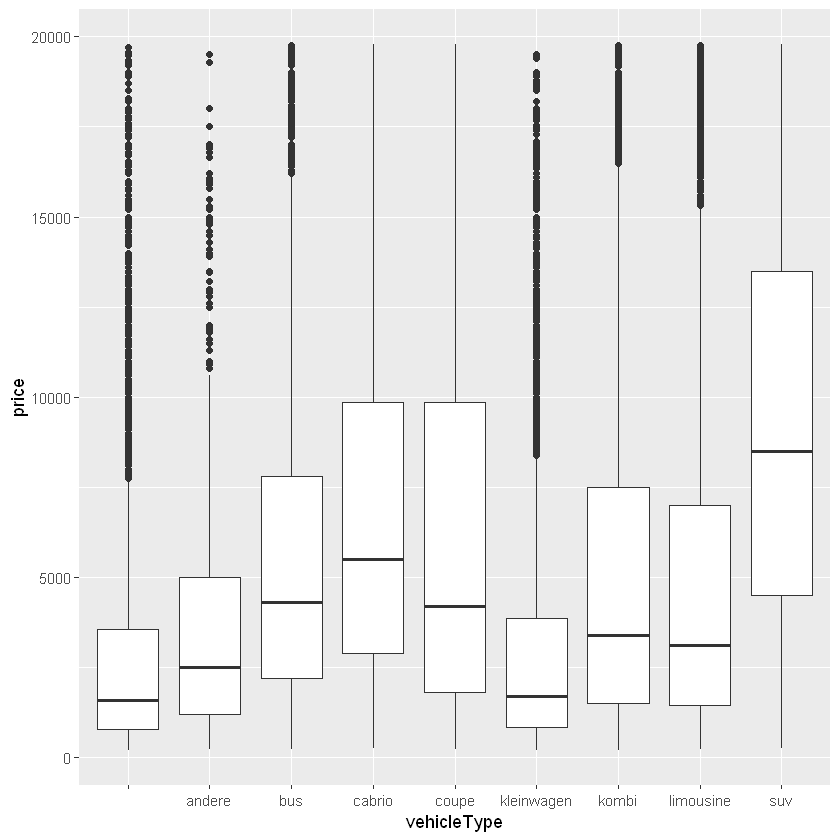

In [8]:
ggplot(aes(x=vehicleType, y=price), data = auto) + 
  geom_boxplot()

In [9]:
summary(auto$powerPS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    72.0   105.0   111.1   143.0 19208.0 

In [10]:
p1 <- ggplot(aes(x=vehicleType, y=powerPS), data = auto) + 
  geom_boxplot()
p2 <- ggplot(aes(x=vehicleType, y=powerPS), data = auto) + 
  geom_boxplot() +
  ylim(quantile(auto$powerPS, 0.05), quantile(auto$powerPS, 0.95))

Warning message:
"Removed 7988 rows containing non-finite values (stat_boxplot)."

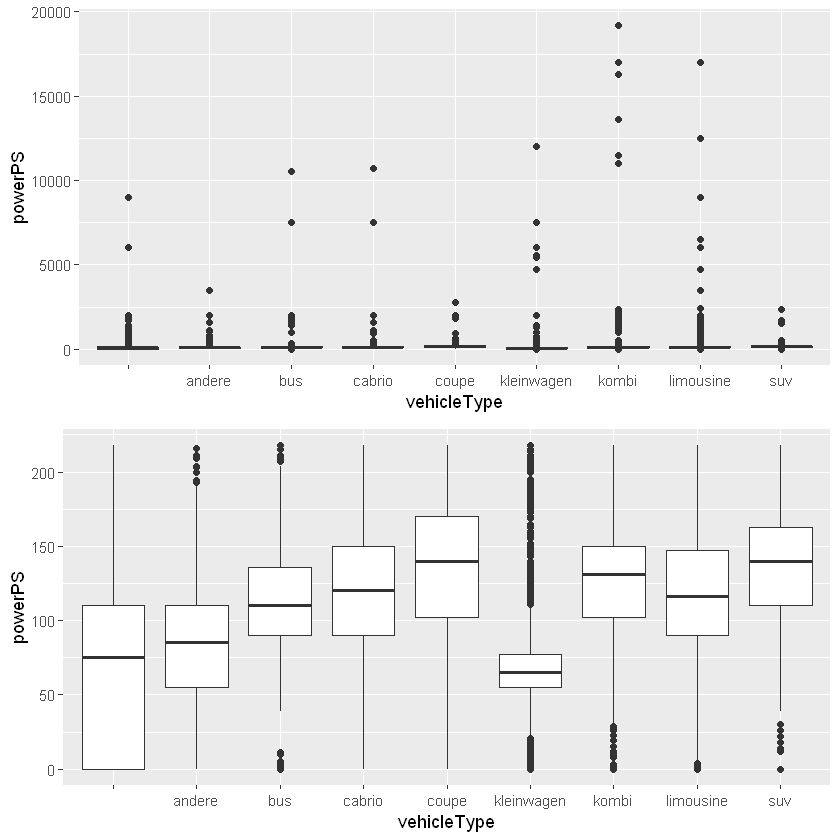

In [11]:
grid.arrange(p1, p2, ncol = 1)

In [12]:
auto  <-  auto[(auto$powerPS > quantile(auto$powerPS, 0.05)) & (auto$powerPS < quantile(auto$powerPS, 0.95)), ]

In [13]:
auto

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
2,2016-03-24 10:58:45,18300,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
3,2016-03-14 12:52:21,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
4,2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
5,2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
6,2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
7,2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
9,2016-04-04 23:42:13,14500,bus,2014,manuell,125,c_max,30000,8,benzin,ford,,2016-04-04 00:00:00,94505,2016-04-04 23:42:13
10,2016-03-17 10:53:50,999,kleinwagen,1998,manuell,101,golf,150000,0,,volkswagen,,2016-03-17 00:00:00,27472,2016-03-31 17:17:06
11,2016-03-26 19:54:18,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,2016-04-06 10:45:34
12,2016-04-07 10:06:22,2799,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,57290,2016-04-07 10:25:17


In [14]:
#VehicleType cleaning

andere        bus     cabrio      coupe kleinwagen      kombi 
     10089       1209      13294       8620       5973      34519      28109 
 limousine        suv 
     37992       4319

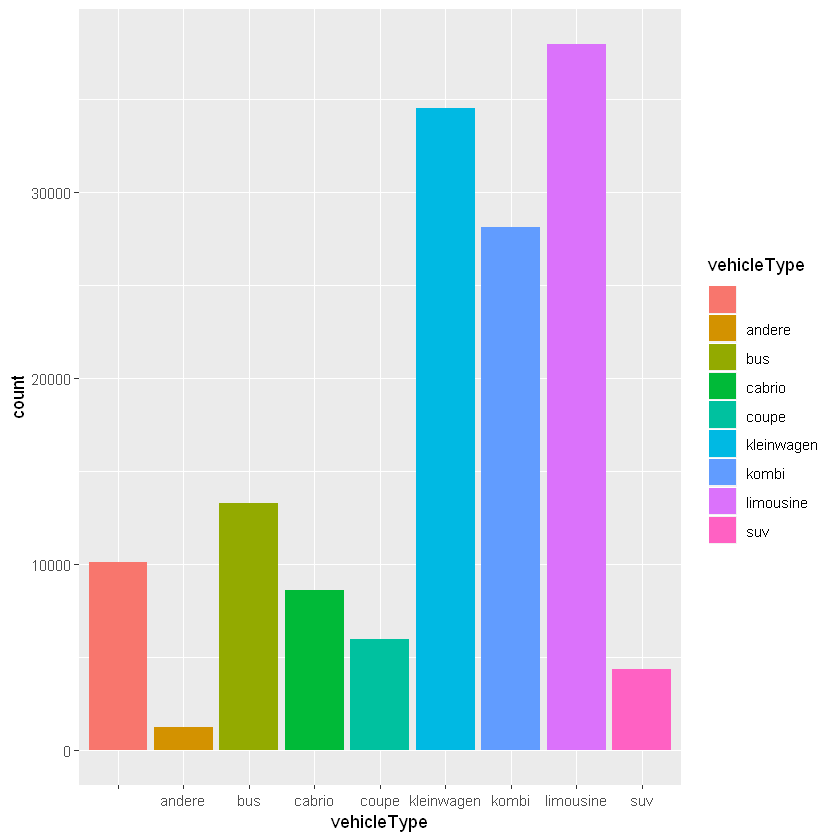

In [15]:
summary(auto$vehicleType)
ggplot(auto, aes(x = vehicleType, fill = vehicleType)) + geom_bar()

In [16]:
auto[auto$vehicleType == "",]

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
17,2016-04-01 12:46:46,300,,2016,,60,polo,150000,0,benzin,volkswagen,,2016-04-01 00:00:00,38871,2016-04-01 12:46:46
23,2016-03-23 14:52:51,2900,,2018,manuell,90,meriva,150000,5,benzin,opel,nein,2016-03-23 00:00:00,49716,2016-03-31 01:16:33
27,2016-03-10 19:38:18,5555,,2017,manuell,125,c4,125000,4,,citroen,nein,2016-03-10 00:00:00,31139,2016-03-16 09:16:46
32,2016-03-29 16:57:02,899,,2016,manuell,60,clio,150000,6,benzin,renault,,2016-03-29 00:00:00,37075,2016-03-29 17:43:07
36,2016-03-08 07:54:46,350,,2016,manuell,75,golf,150000,4,benzin,volkswagen,nein,2016-03-08 00:00:00,19386,2016-03-08 09:44:50
49,2016-03-25 14:40:12,7750,,2017,manuell,80,golf,100000,1,benzin,volkswagen,,2016-03-25 00:00:00,48499,2016-03-31 21:47:44
52,2016-03-07 18:57:08,2000,,2017,manuell,90,punto,150000,11,diesel,fiat,ja,2016-03-07 00:00:00,66115,2016-03-07 18:57:08
53,2016-04-04 10:57:36,1400,,2016,manuell,55,andere,5000,1,,hyundai,,2016-04-04 00:00:00,34454,2016-04-06 12:45:43
59,2016-03-10 20:53:19,2399,,2018,manuell,64,andere,125000,3,,seat,nein,2016-03-10 00:00:00,33397,2016-03-25 10:17:37
67,2016-03-28 17:41:27,10900,,2017,manuell,101,astra,50000,3,,opel,nein,2016-03-28 00:00:00,63607,2016-04-06 23:15:52


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1800    1999    2003    2003    2008    9999 

Warning message:
"Removed 5693 rows containing non-finite values (stat_boxplot)."

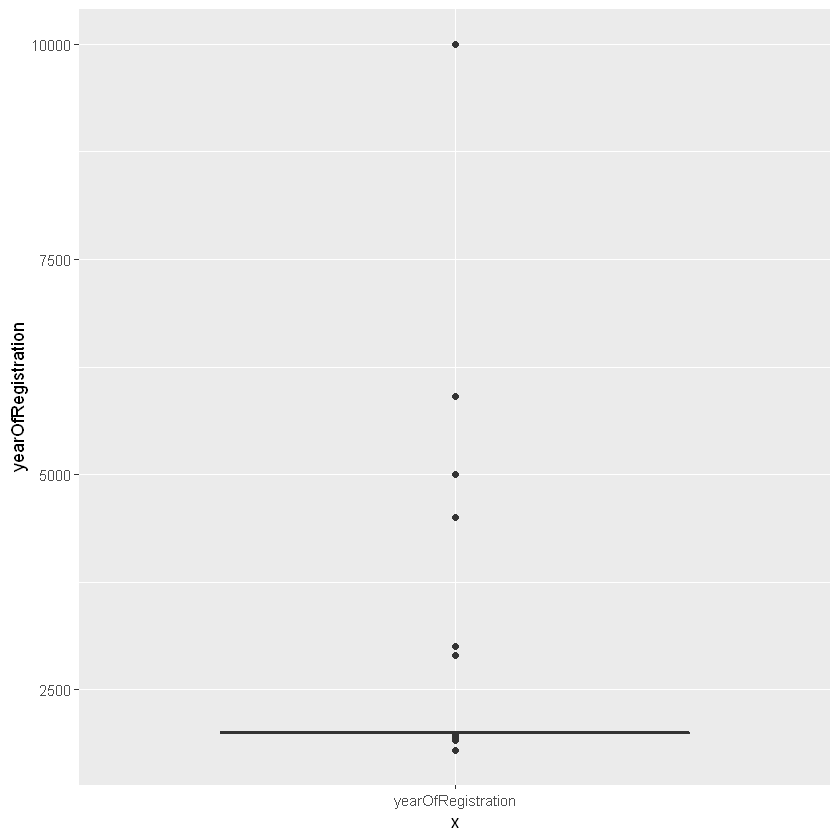

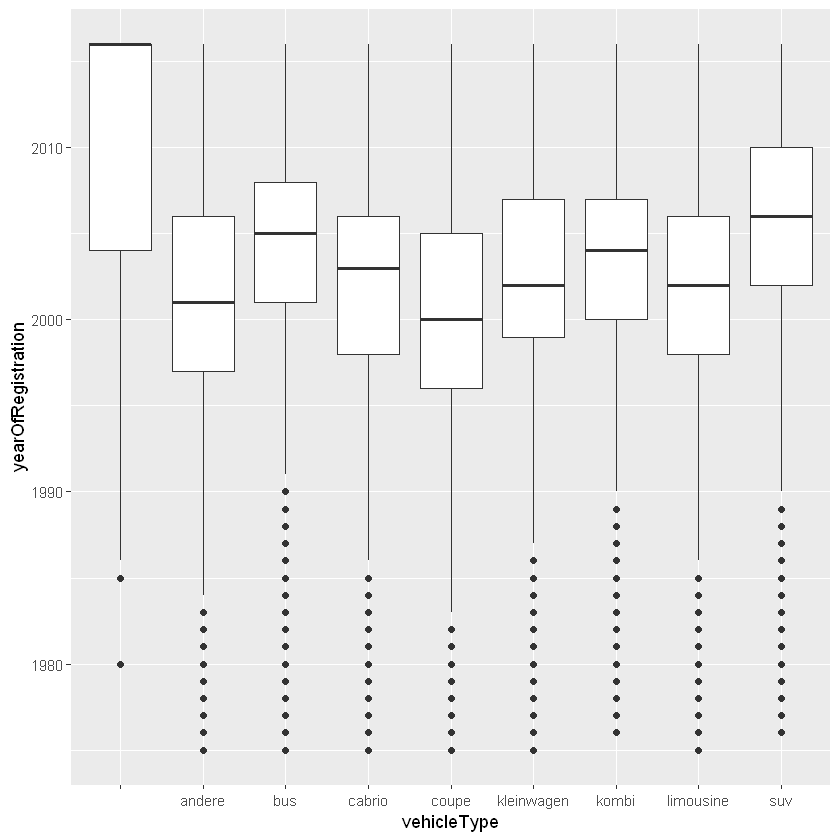

In [17]:
# Year of registration cleaning
summary(auto$yearOfRegistration)
ggplot(aes(x="yearOfRegistration", y=yearOfRegistration), data = auto) + 
  geom_boxplot()
#In summary we can see the max year of registration is 9999 "xD" and the lowest 1800 when 1st car on the world was producet in 1845
#so even if its is the oldest car in the world it's not possible that it were registered in 1800

ggplot(aes(x=vehicleType, y=yearOfRegistration), data = auto) + 
  geom_boxplot() +
  ylim(1975, 2016)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 5693 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 5693 rows containing missing values (geom_point)."

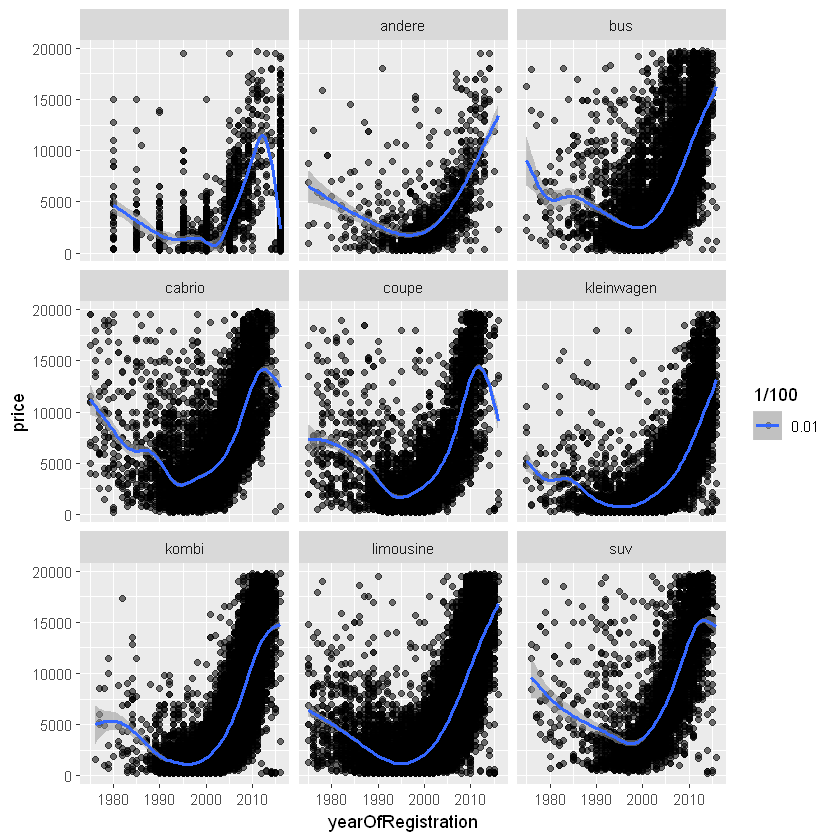

In [18]:
ggplot(aes(x=yearOfRegistration, y=price, alpha = 1/100), data = auto) + 
  geom_point() +
  facet_wrap(~vehicleType) +
  xlim(1975, 2016)+
  geom_smooth()

In [19]:
#Cleaning year of registration
auto <-  auto[(auto$yearOfRegistration >= 1975) & (auto$yearOfRegistration < 2016),]

In [20]:
#Month cleaning data. After cleaning data "yearofRegistration" we can check the "Month". And check the correlation bettwen "Month" and "Year".
summary(auto$monthOfRegistration)
table(auto$monthOfRegistration, auto$yearOfRegistration)
table(auto$monthOfRegistration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   6.000   6.013   9.000  12.000 

    
     1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
  0     4    5    9    8   13   23    8   15   18   14   29   15   31   44   61
  1     1    5    5    4    4   11   10    7   16   17   19   12   15   23   20
  2     4    2    2    7    8    6    5   11   14    7   16    6   17   17   19
  3     3    8    7   17   12    9   15   14   19   19   24   20   21   35   44
  4     1    2    1    6   10    9   12   10    8   20   21   18   25   38   54
  5     4    3    5    6    7   13    7    9   10   20   23   13   20   36   50
  6     4    6    8    8    8   11   11   13   23   10   16   20   20   39   45
  7     8    8    9   15   12   10   15   14   16   14   26   19   31   33   44
  8     6    3    4    4    6    4    4   14    5    7    8   11   19   31   28
  9     3    2    2    9    7    7    6    5   19    9   11   11   19   20   39
  10    3    4    5    5    5    2    4    6    7   16    8   15   20   24   25
  11    1    3    3    7    6    3 


    0     1     2     3     4     5     6     7     8     9    10    11    12 
 7500  9272  8766 14127 11810 11918 12611 10875  9186  9589 10565  9587  9649 

In [21]:
auto$monthOfRegistration[(auto$monthOfRegistration == 0)]  <- NA

In [22]:
table(auto$monthOfRegistration)
str(auto$monthOfRegistration)


    1     2     3     4     5     6     7     8     9    10    11    12 
 9272  8766 14127 11810 11918 12611 10875  9186  9589 10565  9587  9649 

 int [1:135455] 5 8 6 7 10 8 8 NA 12 12 ...


In [23]:
#FUeal type cleaning, we deleted all NA form data Fuealtype because its information that is importatn in choosing used car.
summary(auto$fuelType)
table(auto$vehicleType, auto$fuelType)

andere  benzin     cng  diesel elektro  hybrid     lpg 
   5862      48   86390     254   40903      27      99    1872

            
                   andere benzin   cng diesel elektro hybrid   lpg
               898      2    836     4    329       0      0    16
  andere        89      7    503     9    556       5      0     7
  bus          313      3   4416   112   8200       0      1   229
  cabrio       271      2   7507     2    650       4      0   105
  coupe        221      1   4730     1    782       1      7   118
  kleinwagen  1485      7  29577    35   3065      12     18   209
  kombi       1167      7  11642    71  14702       3     12   477
  limousine   1312     16  25514    19  10257       2     57   568
  suv          106      3   1665     1   2362       0      4   143

In [24]:
auto$fuelType[(auto$fuelType == "")]  <- NA

In [25]:
#Dependence table bettwen fuelType and vehicleType, where we don't have eme
table(auto$fuelType, auto$vehicleType)

         
                andere   bus cabrio coupe kleinwagen kombi limousine   suv
              0      0     0      0     0          0     0         0     0
  andere      2      7     3      2     1          7     7        16     3
  benzin    836    503  4416   7507  4730      29577 11642     25514  1665
  cng         4      9   112      2     1         35    71        19     1
  diesel    329    556  8200    650   782       3065 14702     10257  2362
  elektro     0      5     0      4     1         12     3         2     0
  hybrid      0      0     1      0     7         18    12        57     4
  lpg        16      7   229    105   118        209   477       568   143

In [26]:
#Brand checking to clan. We can see 40 of different brand variable. So we need to focus on the most popular brand.

summary(auto$brand)
table(auto$vehicleType, auto$fuelType)

alfa_romeo           audi            bmw      chevrolet       chrysler 
           930          10879          13339            638            462 
       citroen          dacia         daewoo       daihatsu           fiat 
          2052            402            197            286           3643 
          ford          honda        hyundai         jaguar           jeep 
          9661           1132           1496             91            214 
           kia           lada         lancia     land_rover          mazda 
          1029             63            173            197           2257 
 mercedes_benz           mini     mitsubishi         nissan           opel 
         11280           1448           1140           1886          15342 
       peugeot        porsche        renault          rover           saab 
          4682             90           6682            178            201 
          seat          skoda          smart sonstige_autos         subaru 
          2742           2479           2333            596            272 
        suzuki         toyota        trabant     volkswagen          volvo 
           961           1969            119          30564           1350

            
                   andere benzin   cng diesel elektro hybrid   lpg
                 0      2    836     4    329       0      0    16
  andere         0      7    503     9    556       5      0     7
  bus            0      3   4416   112   8200       0      1   229
  cabrio         0      2   7507     2    650       4      0   105
  coupe          0      1   4730     1    782       1      7   118
  kleinwagen     0      7  29577    35   3065      12     18   209
  kombi          0      7  11642    71  14702       3     12   477
  limousine      0     16  25514    19  10257       2     57   568
  suv            0      3   1665     1   2362       0      4   143

In [27]:
#Gearbox cleanign from empty data.
summary(auto$gearbox)
table(auto$gearbox, auto$vehicleType)

automatik   manuell 
     2283     22632    110540

           
                  andere   bus cabrio coupe kleinwagen kombi limousine   suv
              313     32   149    175    84        771   308       412    39
  automatik   233    103  1918   1547  1198       2699  6413      7242  1279
  manuell    1539   1041 11207   6819  4579      30938 21360     30091  2966

In [28]:
auto <- auto[(auto$gearbox)!= "",]

In [29]:
summary(auto$gearbox)

automatik   manuell 
        0     22632    110540

In [30]:
summary(auto$model)

golf      andere         3er        polo       corsa      passat 
      11535        8765        7842        5013        4622        4320 
                  astra          a4    c_klasse         5er          a3 
       4307        4278        4117        3390        2537        2519 
   e_klasse       focus      fiesta     2_reihe transporter          a6 
       2440        2366        2233        2183        2043        1808 
     twingo      vectra      fortwo         1er    a_klasse      touran 
       1698        1639        1630        1604        1562        1437 
    3_reihe      mondeo        clio      zafira       punto      megane 
       1436        1410        1340        1251        1224        1147 
      ibiza        lupo     octavia       fabia          ka      cooper 
       1095        1035         969         942         907         900 
      caddy       micra          80      sharan      scenic     6_reihe 
        642         628         616         606         558         552 
    i_reihe      laguna       omega         clk     1_reihe        leon 
        551         547         538         532         522         516 
      civic    mx_reihe      galaxy         slk       yaris      meriva 
        498         473         463         460         459         405 
        one          tt         500        vito        bora    b_klasse 
        400         383         381         380         371         369 
    x_reihe      beetle        colt      kangoo    berlingo         v40 
        369         352         351         351         343         336 
      arosa         fox       tigra      tiguan     transit    sprinter 
        327         327         326         303         299         295 
      c_max      escort          a1       swift     4_reihe         v70 
        287         286         282         280         274         274 
      panda     corolla     qashqai     avensis     z_reihe         eos 
        269         265         255         254         254         251 
   scirocco    insignia         147    seicento          c3       stilo 
        248         247         246         238         234         231 
        156     primera       s_max      almera          c4      espace 
        229         224         223         218         204         202 
      grand      signum          c5     (Other) 
        197         197         193       11237

In [31]:
auto <- auto[(auto$model)!= "",]

In [32]:
summary(auto$model)

golf      andere         3er        polo       corsa      passat 
      11535        8765        7842        5013        4622        4320 
      astra          a4    c_klasse         5er          a3    e_klasse 
       4278        4117        3390        2537        2519        2440 
      focus      fiesta     2_reihe transporter          a6      twingo 
       2366        2233        2183        2043        1808        1698 
     vectra      fortwo         1er    a_klasse      touran     3_reihe 
       1639        1630        1604        1562        1437        1436 
     mondeo        clio      zafira       punto      megane       ibiza 
       1410        1340        1251        1224        1147        1095 
       lupo     octavia       fabia          ka      cooper       caddy 
       1035         969         942         907         900         642 
      micra          80      sharan      scenic     6_reihe     i_reihe 
        628         616         606         558         552         551 
     laguna       omega         clk     1_reihe        leon       civic 
        547         538         532         522         516         498 
   mx_reihe      galaxy         slk       yaris      meriva         one 
        473         463         460         459         405         400 
         tt         500        vito        bora    b_klasse     x_reihe 
        383         381         380         371         369         369 
     beetle        colt      kangoo    berlingo         v40       arosa 
        352         351         351         343         336         327 
        fox       tigra      tiguan     transit    sprinter       c_max 
        327         326         303         299         295         287 
     escort          a1       swift     4_reihe         v70       panda 
        286         282         280         274         274         269 
    corolla     qashqai     avensis     z_reihe         eos    scirocco 
        265         255         254         254         251         248 
   insignia         147    seicento          c3       stilo         156 
        247         246         238         234         231         229 
    primera       s_max      almera          c4      espace       grand 
        224         223         218         204         202         197 
     signum          c5        aygo     (Other) 
        197         193         192       11045

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5000  125000  150000  127860  150000  150000 

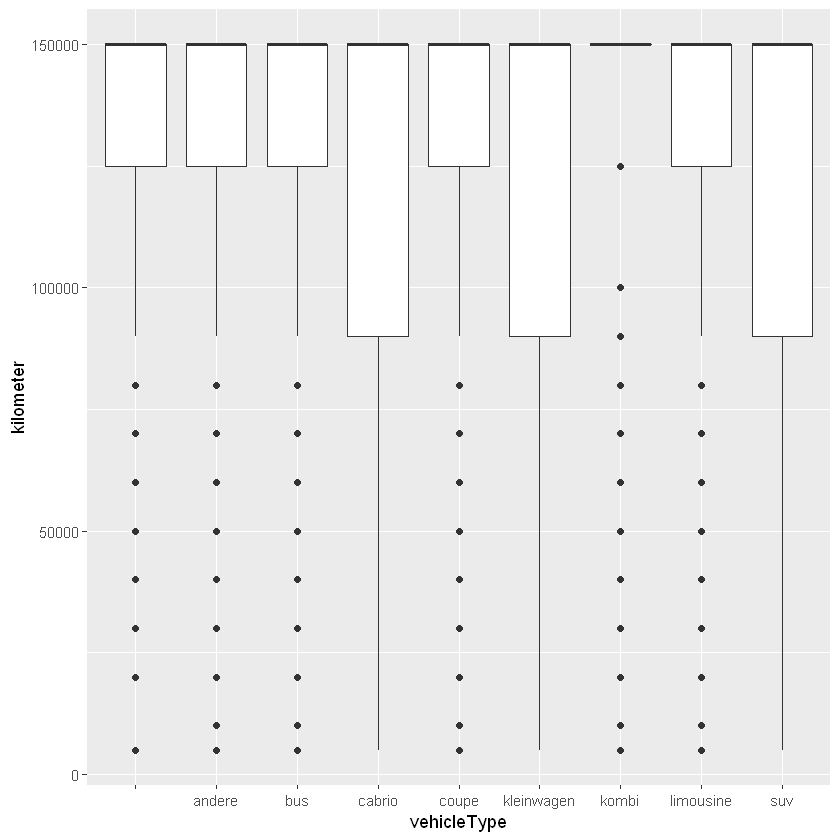

In [33]:
summary(auto$kilometer)
ggplot(aes(x=vehicleType, y=kilometer), data = auto) + 
  geom_boxplot()

In [34]:
summary(auto$notRepairedDamage)
table(auto$notRepairedDamage)

ja   nein 
 16238  11827 100800


           ja   nein 
 16238  11827 100800 

In [35]:
auto <-  auto[(auto$notRepairedDamage != ""),]

In [36]:
table(auto$notRepairedDamage)


           ja   nein 
     0  11827 100800 

In [37]:
auto$notRepairedDamage <-  ifelse(auto$notRepairedDamage == "ja", "yes", "no")

In [38]:
#We added a new variable "Selling time" into the dataset. Which show us how old is the car.
auto$sellingTime <-  as.integer(as.Date(auto$lastSeen) - as.Date(auto$dateCreated))

In [39]:
str(auto$sellingTime)
summary(auto$sellingTime)
table(auto$sellingTime)

 int [1:112627] 0 6 2 4 11 0 2 16 17 13 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   6.000   9.002  14.000 384.000 


    0     1     2     3     4     5     6     7     8     9    10    11    12 
14349  6434 12016  5615  8528  3965  6385  3934  5414  4148  2924  4009  2909 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
 2820  2744  2442  2199  1943  2351  1549  1117  1829  1900  1302  1393  1157 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
 1324  1268   978  1187   810   946   205   386    12    28     6     4     8 
   39    40    41    42    43    44    45    46    47    48    49    51    52 
    5     3     5     4     2     3     3     5     4     3     3     6     1 
   54    55    57    58    59    60    61    62    63    65    68    69    71 
    1     1     1     3     6     1     2     4     1     1     2     1     1 
   72    80    88    89    91    94    95    96    98   108   110   135   146 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  193   239   384 
    2     1     1 

In [40]:
auto$sellingTime[(auto$sellingTime > 35)]  <- NA

In [41]:
table(max(auto$sellingTime) - auto$sellingTime)

< table of extent 0 >

In [42]:
#We adde a new variable "Age" which is derived from "Year of registration".

In [43]:
auto$age  <- as.factor(year(Sys.Date()) - auto$yearOfRegistration)

In [44]:
str(auto$postalCode)

 int [1:112627] 91074 60437 33775 67112 96224 57290 90762 4177 65599 88361 ...


In [45]:
auto$postalCode  <- as.factor(auto$postalCode)

In [46]:
summary(auto$postalCode)

10115   65428   40764   66333   52525   48249   50354   61169   60311   52249 
    265     197     110     109      99      97      97      94      91      89 
  63263   38518   87700   32257   47877   53757   33100   44145   48599   30419 
     89      88      88      85      85      85      84      84      84      82 
  52428   65549   45326   90763   65929   65719   44866   77933   35510   44339 
     82      82      81      81      80      79      78      78      77      77 
  66740   45888   60386   63303   50374   66424   78224   94315   92224   92637 
     77      76      76      76      75      75      75      75      74      74 
  41812   38259   45355   57223   61440   65795   21423   60486   65197   31535 
     73      72      72      72      72      72      71      71      71      70 
  32457   45881   50259   66386   42929   56070   59192   91301   25436   26871 
     70      70      70      70      69      69      69      69      68      68 
  44805   14612   31275   32049   41334   45327   45699   58675   63128   63225 
     68      67      67      67      67      67      67      67      67      67 
  65933   25524   32791   45968   52477   53639   56564   57299   94469   10969 
     67      66      66      66      66      66      66      66      66      65 
  13403   30179   36251   38226   57234   59269   63069   65510   85055   13357 
     65      65      65      65      65      65      65      65      65      64 
  16515   25421   26789   35708   41061   66663   22119   24768   34123 (Other) 
     64      64      64      64      64      64      63      63      63  105016

In [47]:
library(data.table)
library(ggplot2)
library(lubridate)
library(dplyr)
library(gridExtra)


Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from 'package:base':

    date



In [48]:
#Creating plots to visualisation count of changes in Vehicle Type and nubmer of engine power. We can notice thatthe most of registered cars are  "limousine" and "kleinwegan".
# In other hand the media of engine power is close to 100 so it's not impressive when most of familly cars are in this mean.

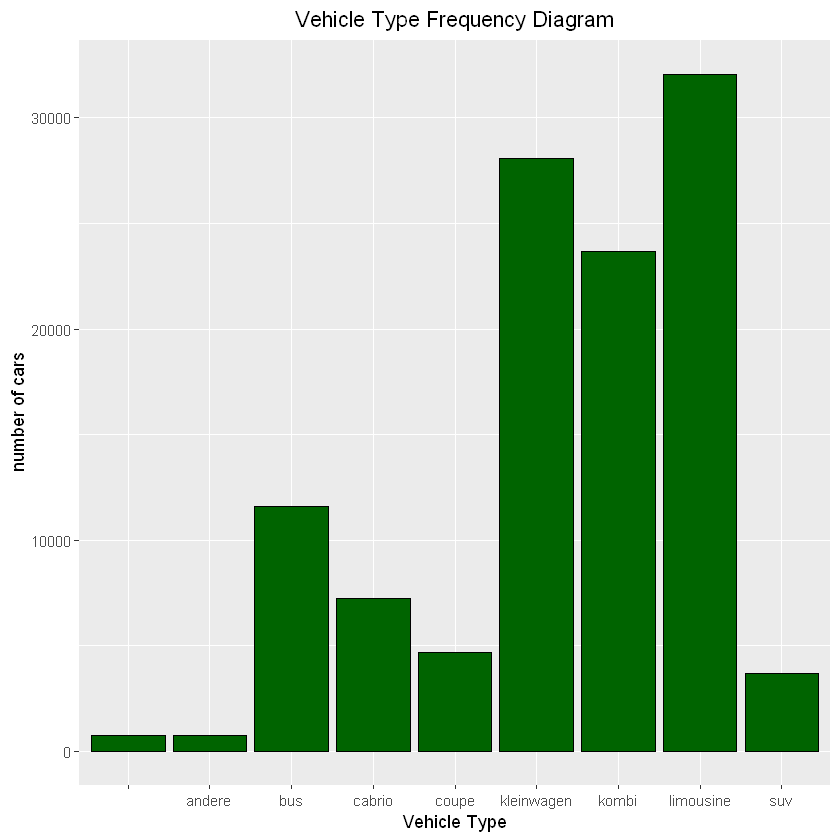

In [49]:
ggplot(auto, aes(x = vehicleType)) +
    geom_bar(fill = 'darkgreen', color = 'black') +
    scale_fill_brewer(type = 'div') +
    labs(x = "Vehicle Type", y = 'number of cars') +
    ggtitle('Vehicle Type Frequency Diagram') +
    theme(plot.title = element_text(hjust = 0.5))

Warning message:
"Ignoring unknown parameters: bindwidth"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


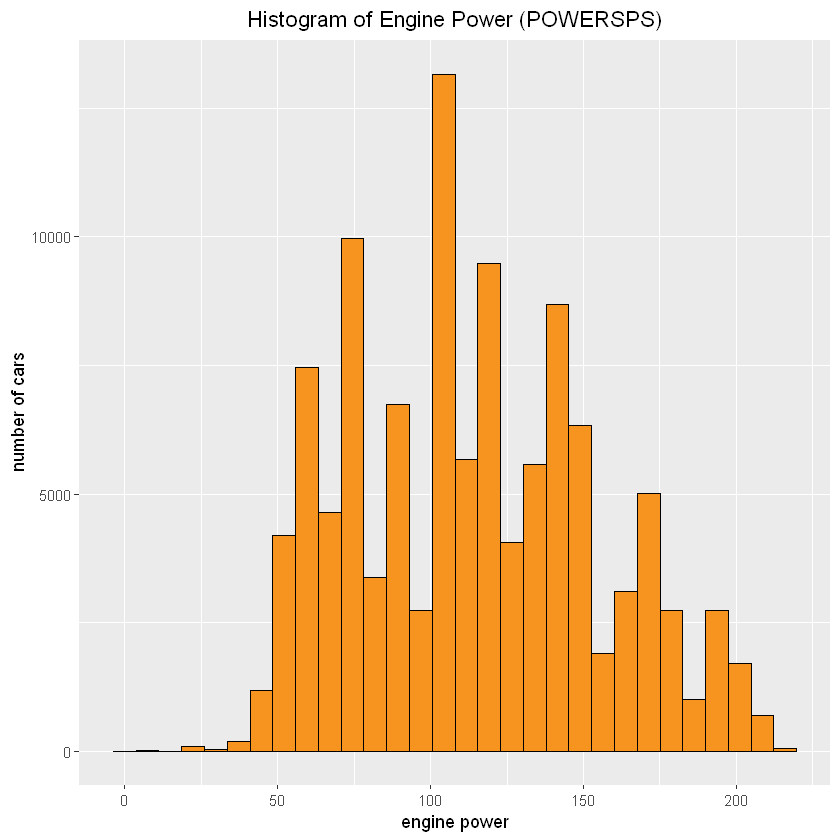

In [50]:
ggplot(auto, aes(auto$powerPS)) +
    geom_histogram(fill = I('#F79420'), color = "black", bindwidth = 1) +
    labs(x = 'engine power', y = 'number of cars') +
    ggtitle("Histogram of Engine Power (POWERSPS)")+
    theme(plot.title = element_text(hjust = 0.5))

Warning message:
"Removed 107 rows containing non-finite values (stat_bin)."

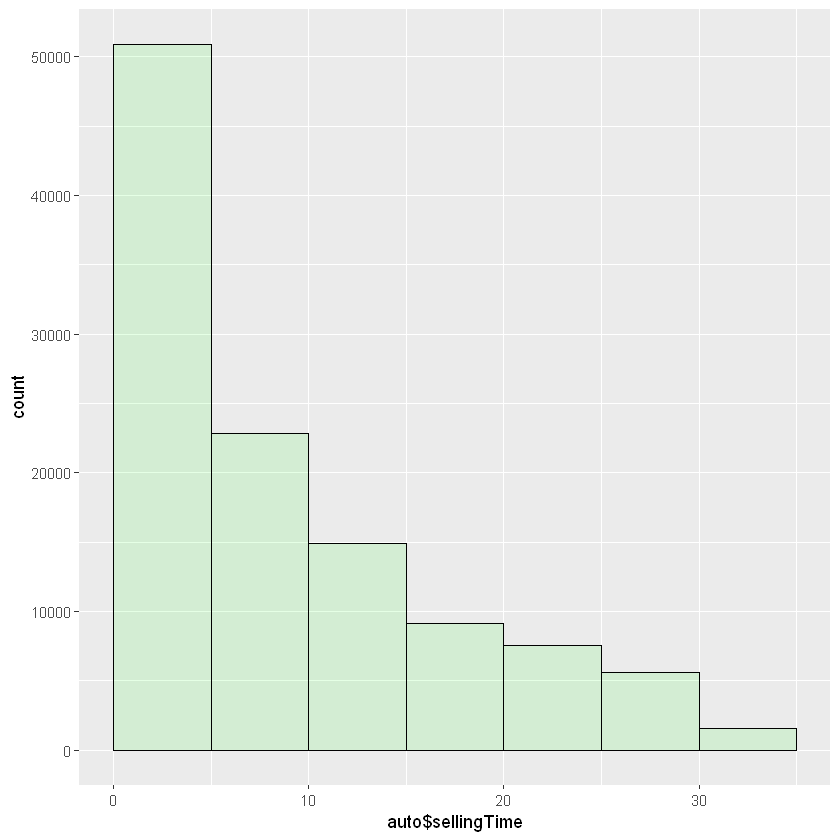

In [51]:
ggplot(auto, aes(auto$sellingTime)) +
    geom_histogram(breaks = seq(0, 35, by = 5),
                  col = "black",
                  fill = "green",
                  alpha = .1)

In [52]:
#The nubmer of manual gearbox is higher than the automatic one. It's not suprising considering when before 
#we watch the ages and kilometers of the second-hand cars.

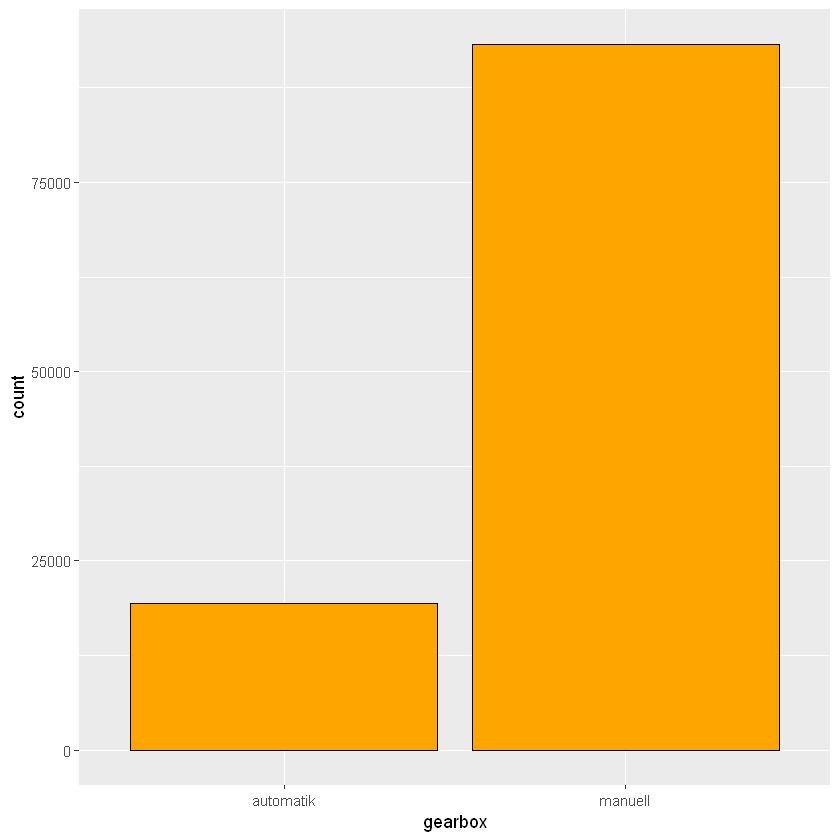

In [53]:
#Gearbox
ggplot(aes(x = gearbox), 
       data = subset(auto, !is.na(gearbox))) +
    geom_bar(color = 'black', fill = 'orange')

In [54]:
#Kilometer Histogram
#The concetratio on the 100.000+ km, particualrty 150.000 km, is intersting, even that scale_y_log10() becomes necessary to observe the distribution.

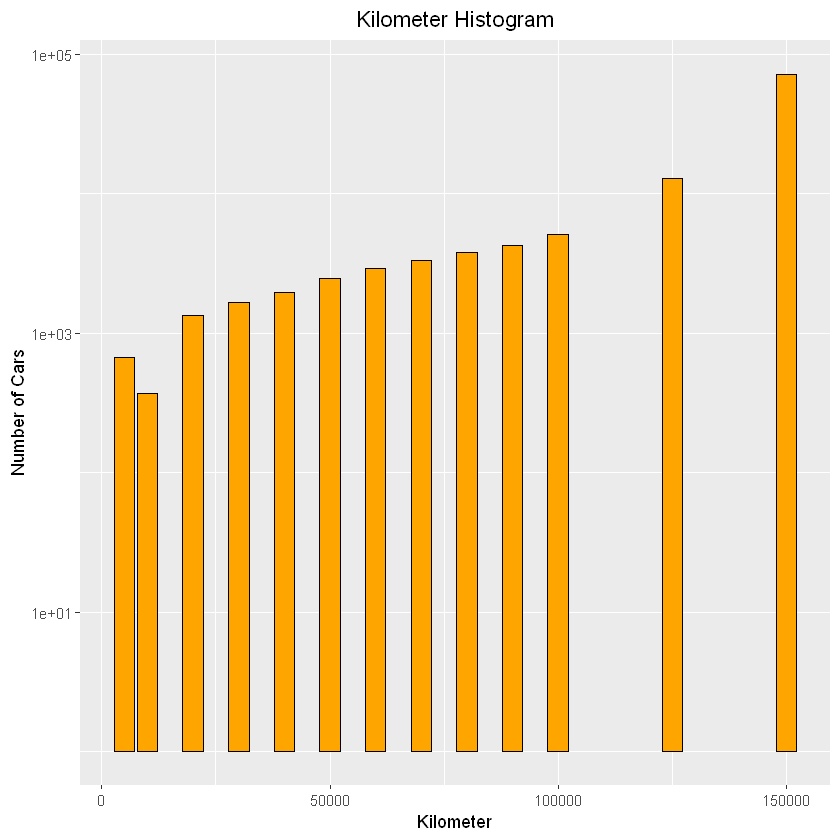

In [55]:
ggplot(aes(auto$kilometer), data = auto) +
    geom_bar(color = 'black', fill = "orange") +
    scale_y_log10() +
    labs(x = "Kilometer", y = "Number of Cars", title = "Kilometer Histogram") +
    theme(plot.title = element_text(hjust = 0.5))

In [56]:
#Age variable shows normal distribuation with mean and median of approximately 14 year.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 317 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

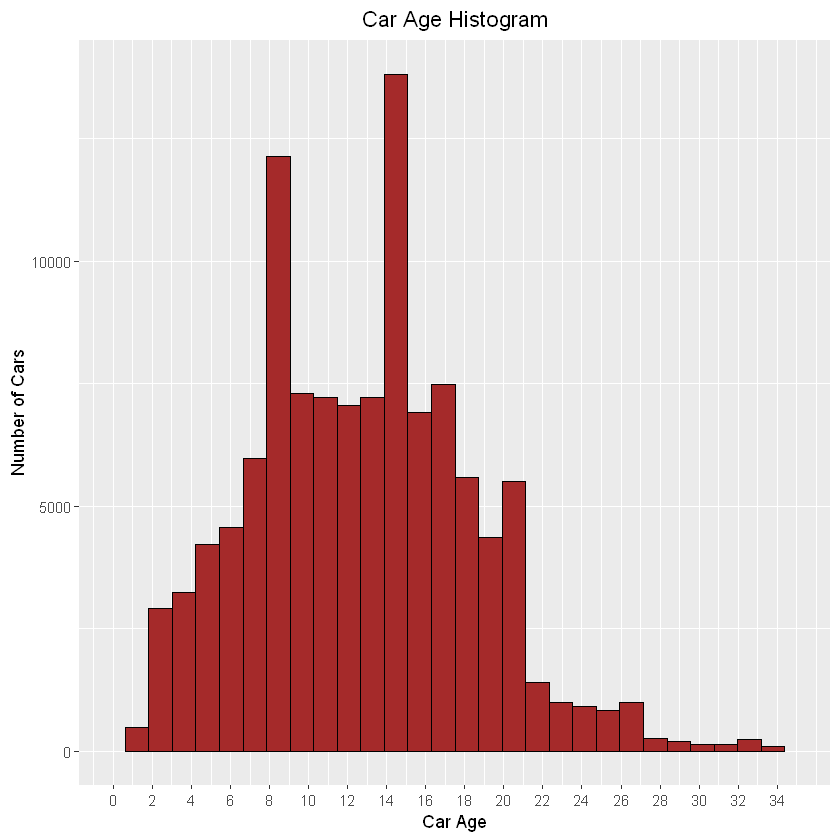

In [57]:
ggplot(aes(as.integer(auto$age)), data = auto) +
    geom_histogram(color = "black", fill = "brown") +
    scale_x_continuous(limit = c(0, 35), breaks = seq(0, 35, 2)) +
    labs(x = "Car Age", y = "Number of Cars", title = "Car Age Histogram") +
    theme(plot.title = element_text(hjust = 0.5))

In [58]:
#Majority of the second hand cars fule type are benzin or diesel but hybird, elektro, cng stand for emergence of new trends in the second-hand car market

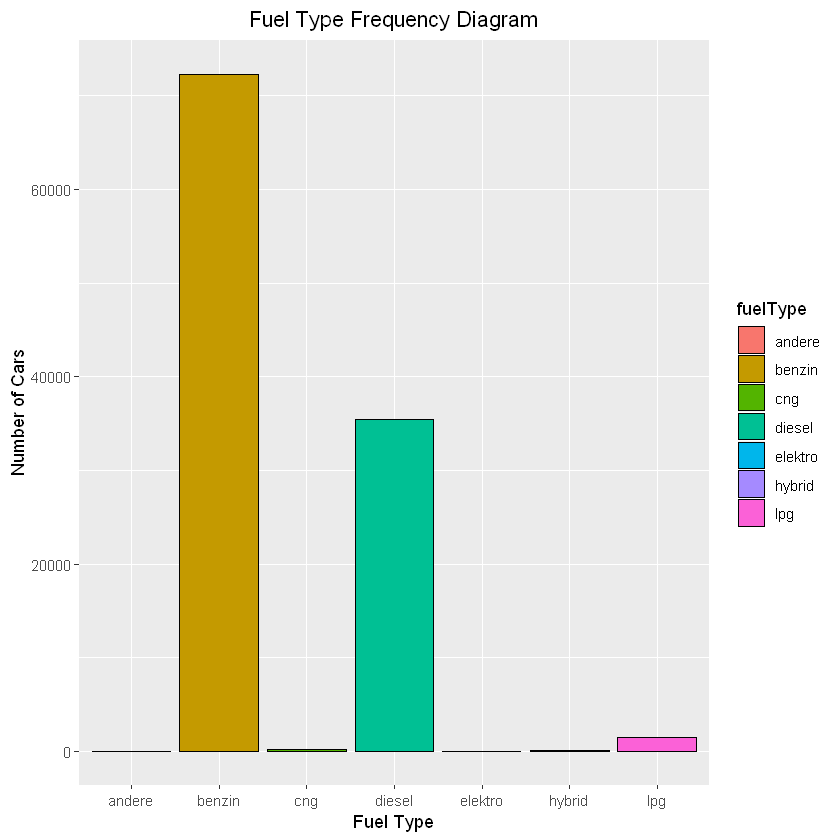

In [59]:
ggplot(aes(fuelType), data = subset(auto, !is.na(fuelType))) +
    geom_bar(aes(fill = fuelType), color = "black") +
    labs(x = "Fuel Type", y = "Number of Cars", title = "Fuel Type Frequency Diagram") +
    theme(plot.title = element_text(hjust = 0.5))

In [60]:
#We check how price change in different vehilce type, and we observe theat SUV is the most expensive vehicle

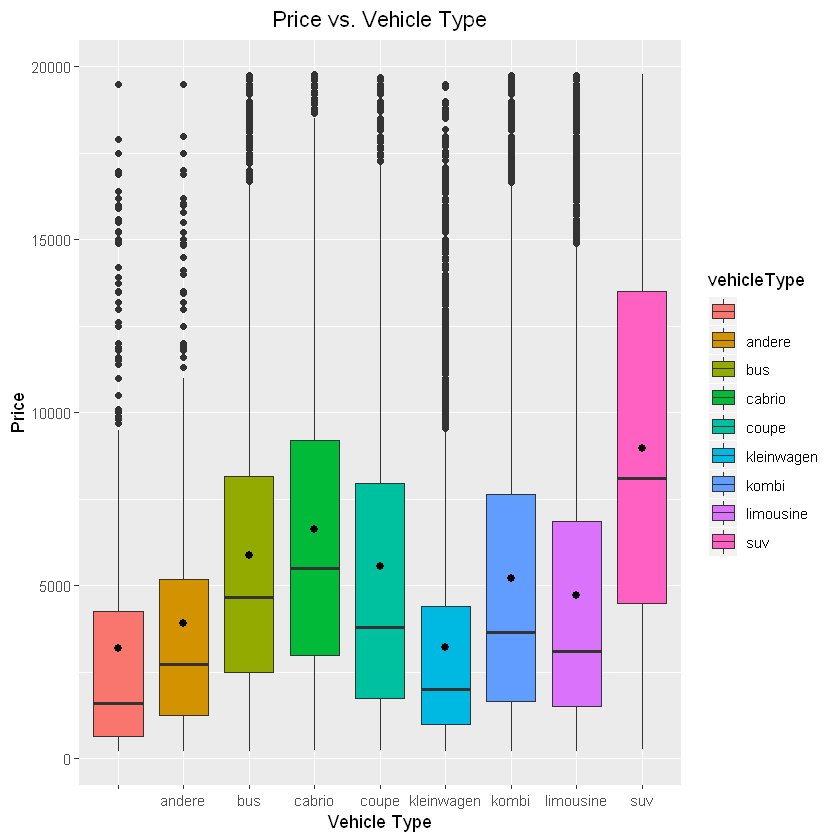

In [61]:
ggplot(auto, aes(x = vehicleType, y = price)) +
    geom_boxplot(aes(fill = vehicleType)) +
    stat_summary(fun.y = mean, geom = 'point', size = 2) +
    xlab("Vehicle Type") + 
    ylab("Price") +
    ggtitle("Price vs. Vehicle Type") +
    theme(plot.title = element_text(hjust = 0.5))

In [62]:
#Engine Power vs. Price
#There is linear correlation between eninge power (PowersPS) and Price in eatch vehicle type till 150 powerPS then the observation is non-linear.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


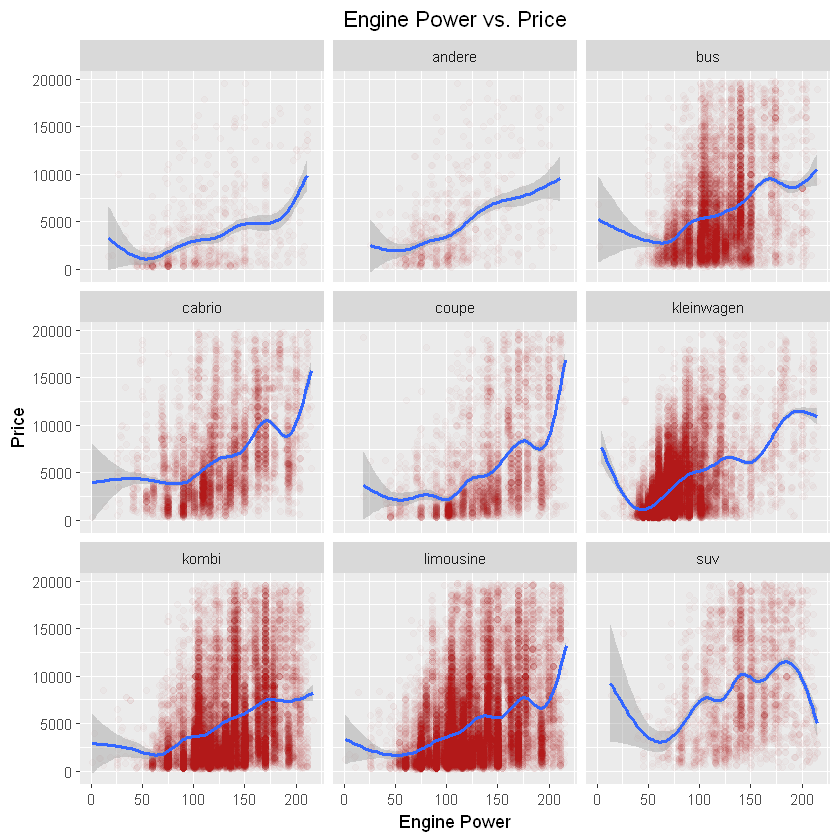

In [63]:
ggplot(data = subset(auto, !is.na(powerPS)), aes(x = powerPS, y = price)) + 
    geom_point(alpha = 1/50, color = I("#990000"), position = 'jitter') +
    geom_smooth() +
    facet_wrap(~vehicleType) +
    xlab('Engine Power') +
    ylab("Price") +
    ggtitle("Engine Power vs. Price") +
    theme(plot.title = element_text(hjust = 0.5))


In [64]:
#Engine Power vs. Vehicle Type
#This graph shows similar trend with the correlation between price and 
#vehicle type. Kleinwagen has the lowest average engine power yet the outliers may stand for specific 
#higher end brand-model combination or user error.

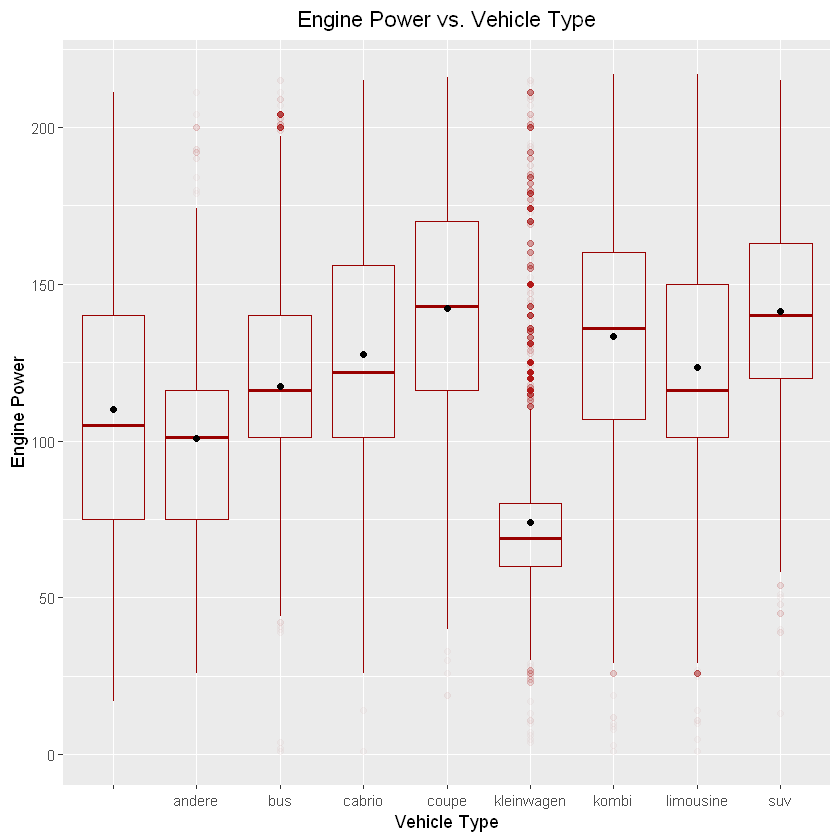

In [65]:
ggplot(data = subset(auto, !is.na(powerPS)), aes(x = vehicleType, y = powerPS)) +
    geom_boxplot(alpha = 1/50, color = I("#990000")) +
    stat_summary(fun.y = mean, geom = "point") +
    xlab('Vehicle Type') +
    ylab("Engine Power") +
    ggtitle("Engine Power vs. Vehicle Type") +
    theme(plot.title = element_text(hjust = 0.5))

# Selling Time vs. Vehicle Type

Warning message:
"Removed 107 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 107 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 107 rows containing non-finite values (stat_summary)."

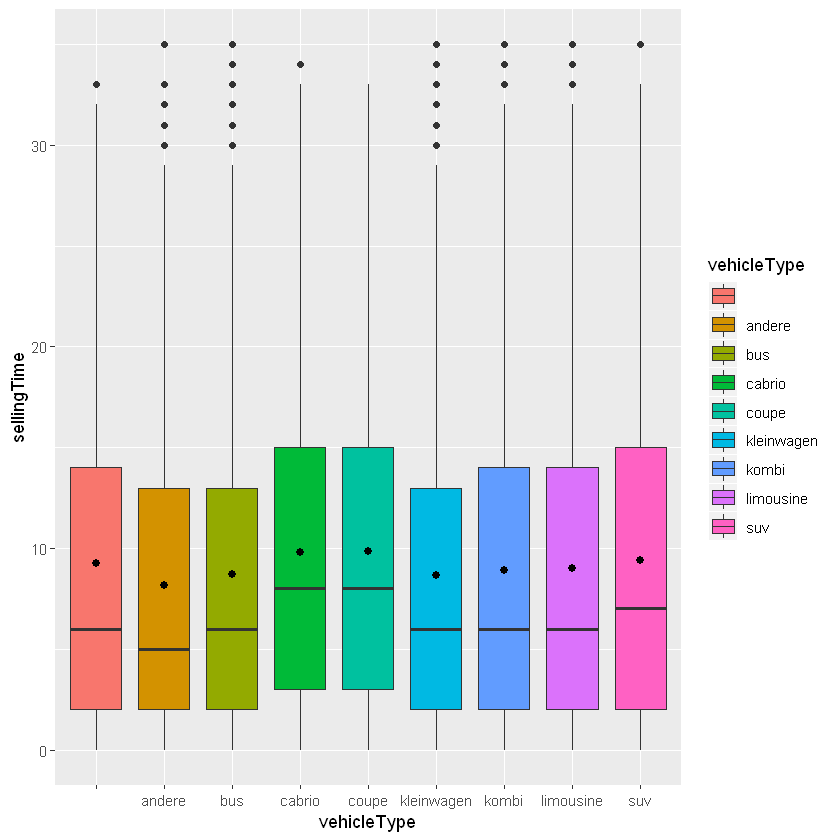

In [66]:
ggplot(aes(x = vehicleType, y = sellingTime), data = auto) +
    geom_boxplot(fill = "lightblue", color = "black") +
    geom_boxplot(aes(fill = vehicleType)) +
    stat_summary(fun.y = mean, geom = "point", size = 2) +
    theme(plot.title = element_text(hjust = 0.5))

# Selling Time vs. Price

Same as "Selling Time vs. Vehicle Type, we thought it will be relationship between selling time and selling. There doesn't seem to be stron correlation.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 107 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 107 rows containing missing values (geom_point)."


	Pearson's product-moment correlation

data:  auto$sellingTime and auto$price
t = 49.572, df = 112518, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1404717 0.1519079
sample estimates:
      cor 
0.1461947 


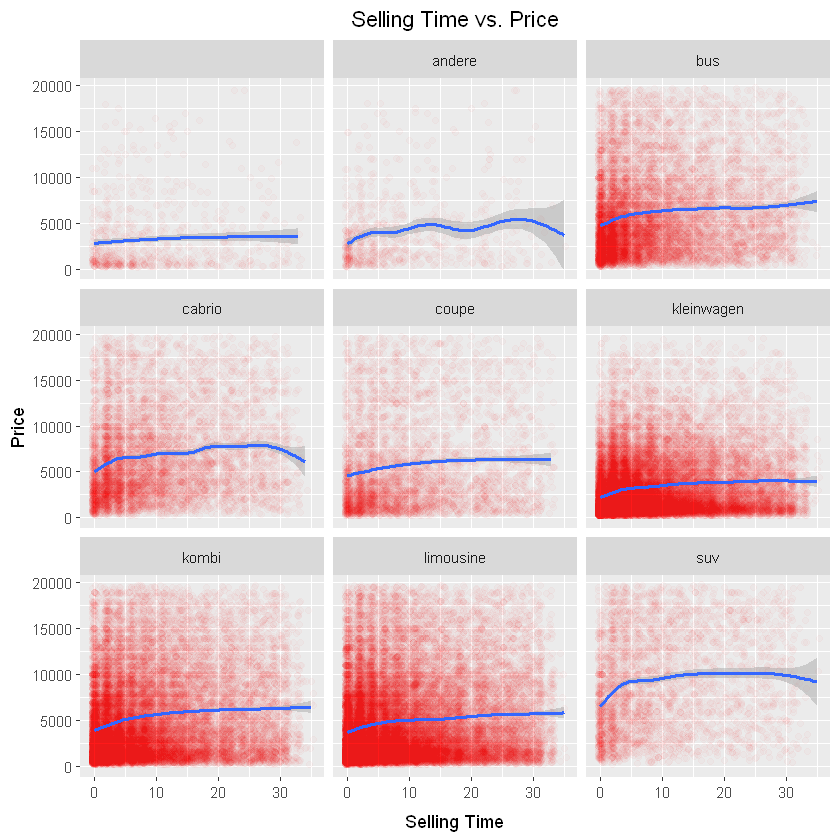

In [67]:
ggplot(data = auto, aes(x = sellingTime, y = price)) +
    geom_point(alpha = 1/50, color = I("red"), position = "jitter") +
    geom_smooth() +
    facet_wrap(~vehicleType) +
    xlab("Selling Time") +
    ylab("Price") +
    ggtitle("Selling Time vs. Price") +
    theme(plot.title = element_text(hjust = 0.5))

cor.test(auto$sellingTime, auto$price)

# Kilometer vs. Selling Time

Like vehicle type and price, a significant trend between selling time and kilometer did not emerage.

In [68]:
cor.test(auto$sellingTime, auto$kilometer)


	Pearson's product-moment correlation

data:  auto$sellingTime and auto$kilometer
t = -25.014, df = 112518, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.08017284 -0.06855151
sample estimates:
       cor 
-0.0743647 


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 107 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 107 rows containing missing values (geom_point)."

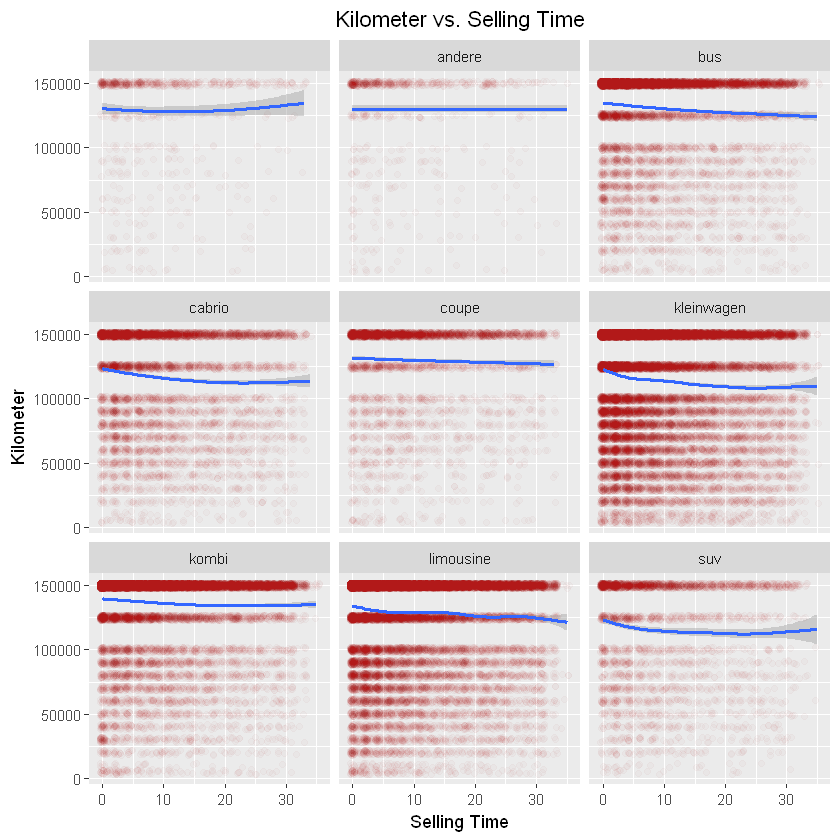

In [69]:
ggplot(data = auto, aes(x = sellingTime, y = kilometer)) +
    geom_point(alpha = 1/50, color = I("#990000"), position = 'jitter') +
    geom_smooth() +
    facet_wrap(~vehicleType) +
    xlab("Selling Time") +
    ylab("Kilometer") +
    ggtitle("Kilometer vs. Selling Time") +
    theme(plot.title = element_text(hjust = 0.5))

# Engine Power vs. Selling Time 

Corelattion test bettwen Engine Power vs Selling Time

In [70]:
cor.test(auto$sellingTime, auto$powerPS)


	Pearson's product-moment correlation

data:  auto$sellingTime and auto$powerPS
t = 18.905, df = 112518, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05044375 0.06209270
sample estimates:
       cor 
0.05627014 


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 107 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 107 rows containing missing values (geom_point)."

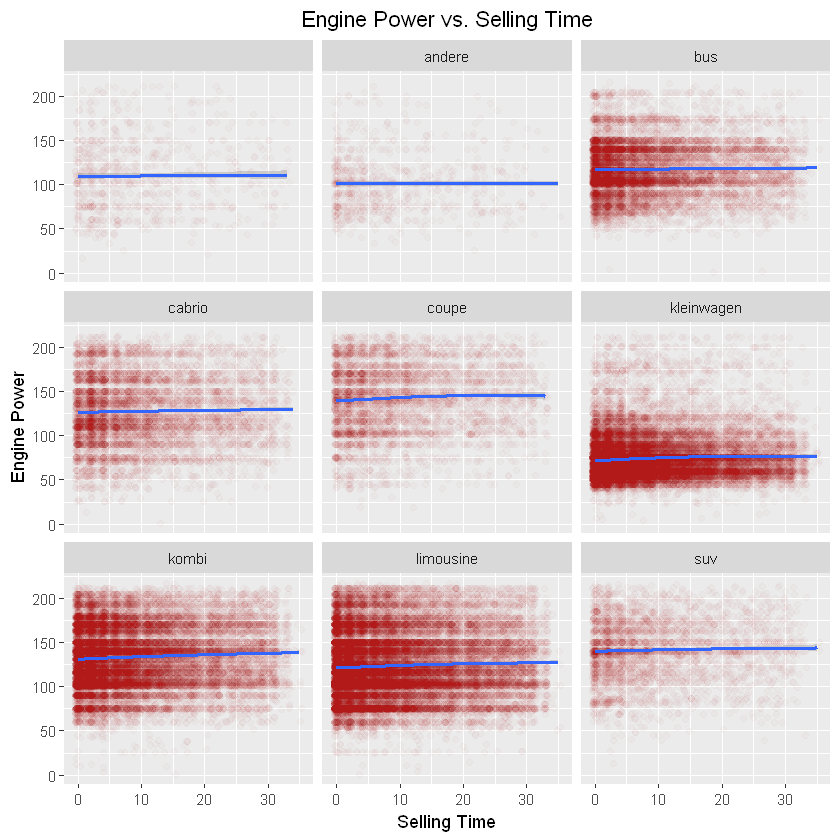

In [71]:
ggplot(data = auto, aes(x = sellingTime, y = powerPS)) +
    geom_point(alpha = 1/50, color = I("#990000"), position = "jitter") +
    geom_smooth() +
    facet_wrap(~vehicleType) +
    xlab("Selling Time") +
    ylab("Engine Power") +
    ggtitle("Engine Power vs. Selling Time") +
    theme(plot.title = element_text(hjust = 0.5))

# Price vs. Gearbox

The second - hand cars with automatic gearbox are more expensive than manual ones.

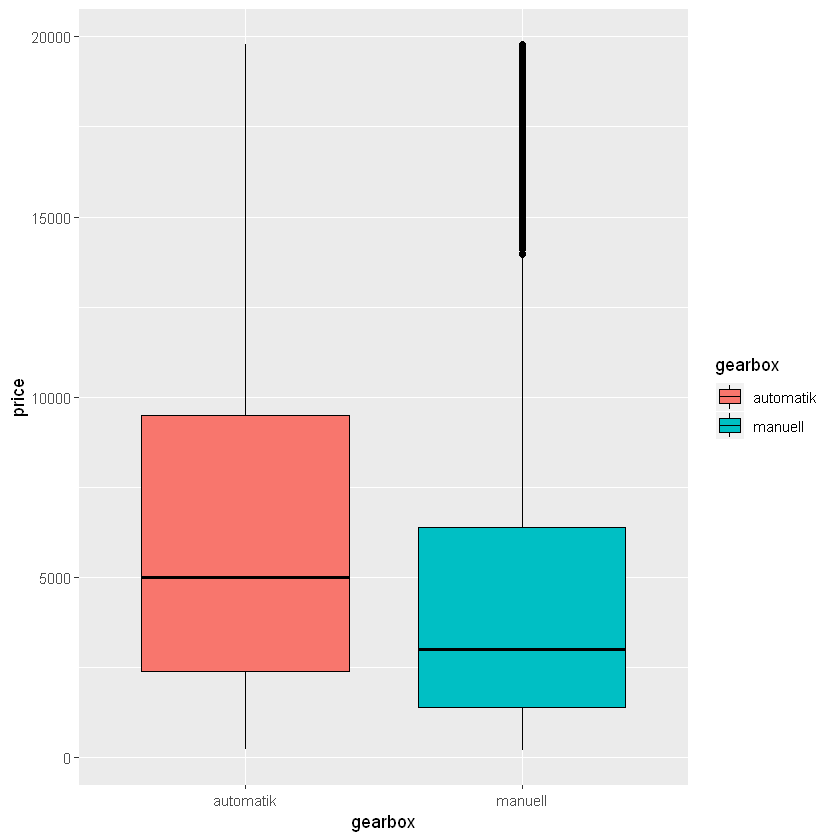

In [72]:
ggplot(aes(x = gearbox, y = price), data = subset(auto, !is.na(gearbox))) +
    geom_boxplot(aes(fill = gearbox), color = "black")

# Price vs. Vehicle Type by Gearbox

We can see in every sytuation the automatik gearbox is more expensive than manual.

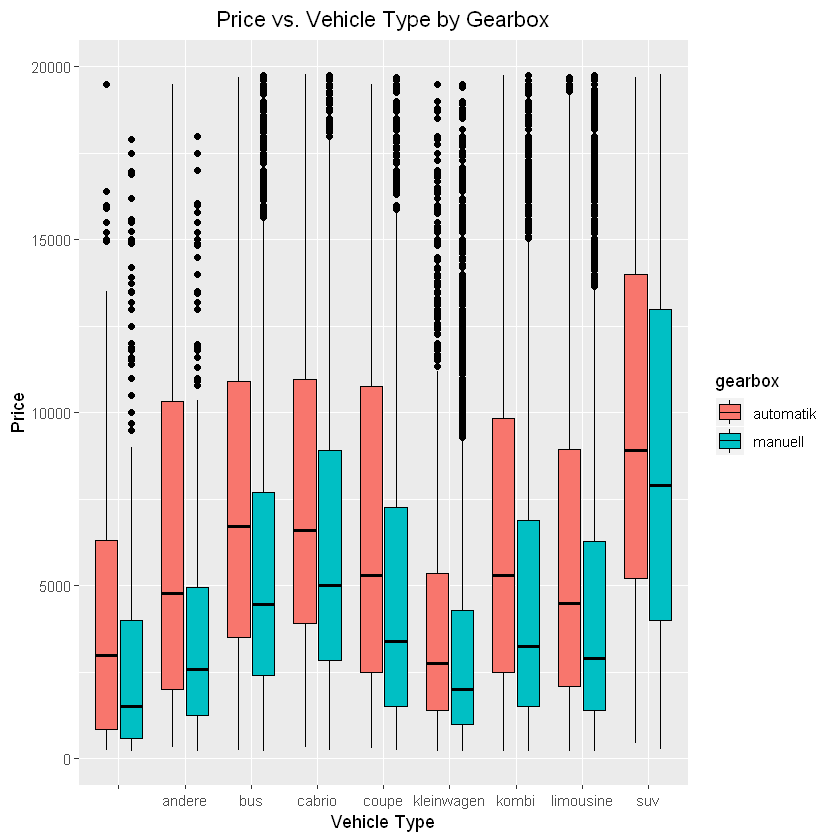

In [73]:
ggplot(aes(x = vehicleType, y = price), data = subset(auto, !is.na(gearbox))) +
    geom_boxplot(aes(fill = gearbox), color = "black") +
    labs(x = "Vehicle Type", y = "Price", title = "Price vs. Vehicle Type by Gearbox") +
    theme(plot.title = element_text(hjust = 0.5))

# Price vs. Age by Vehicle Type

In all vehicle types, the prcie is decreasing between 0-20 years but start increase after between 20-30 years. Probably the cars 20+ are registered as "antique" and are the part of the collection.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


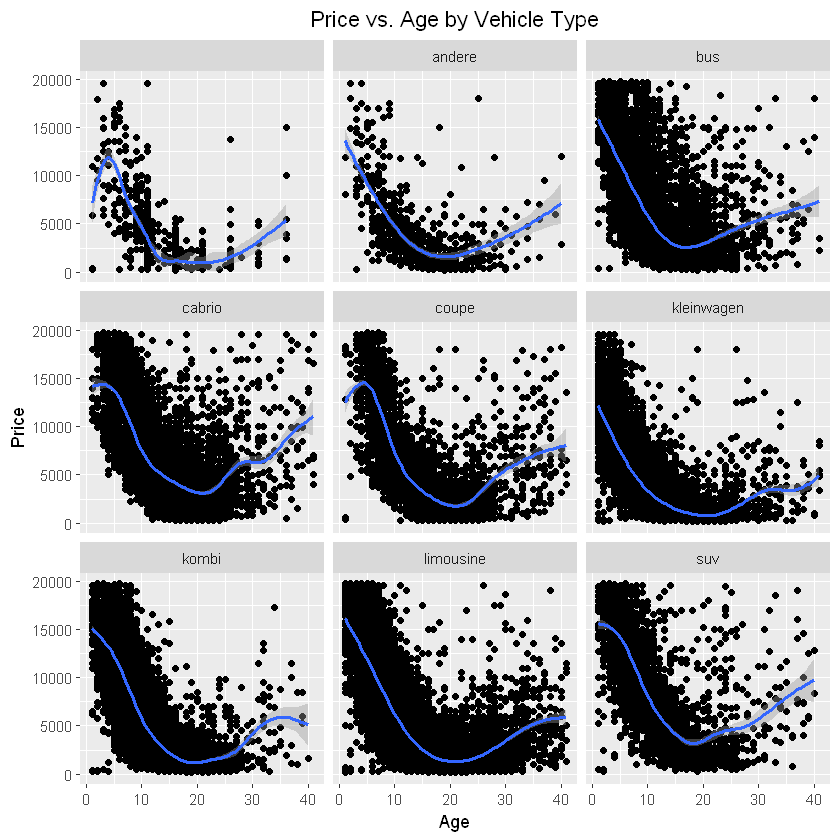

In [74]:
ggplot(aes(x = as.integer(age), y = price), data = auto) +
    geom_point() +
    facet_wrap(~vehicleType) +
    geom_smooth() +
    labs(x = "Age", y = "Price",
            title = "Price vs. Age by Vehicle Type") +
    theme(plot.title = element_text(hjust = 0.5))

# Price vs. Gearbox by Fueal Type

Fuel type does not seem to have significant impact on the correlation between price and gearbox.

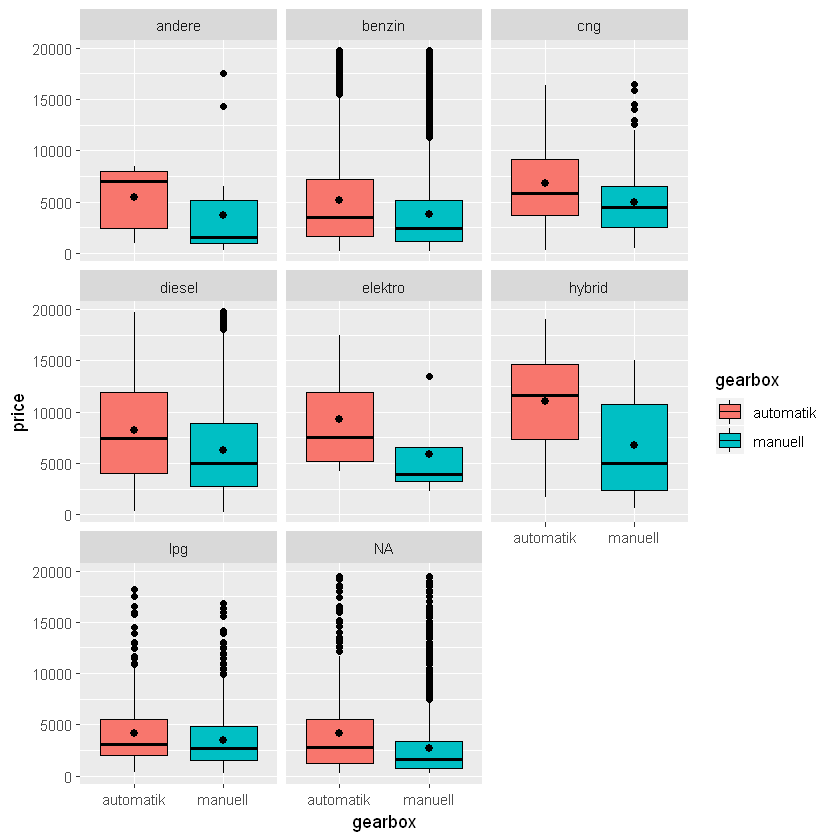

In [75]:
ggplot(aes(x = gearbox, y = price), data = subset(auto, !is.na(gearbox))) +
    geom_boxplot(aes(fill = gearbox), color = "black") +
    facet_wrap(~fuelType) +
    stat_summary(fun.y = mean, geom = "point", size = 2)

# Selling Time vs. Fuel Type by Gearbox

The electric and CNG cars show longer selling tiome tren which may indicate that second - hand car market is not ready for hybrid cars.

Warning message:
"Removed 104 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 104 rows containing non-finite values (stat_summary)."

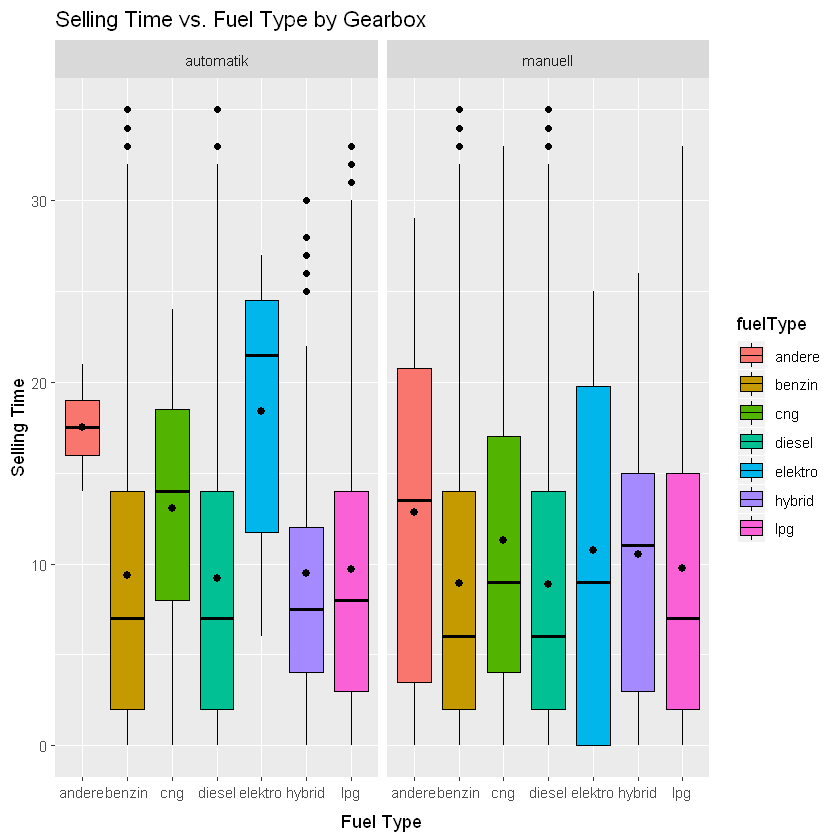

In [76]:
ggplot(data = subset(auto, !is.na(gearbox) & !is.na(fuelType)), aes(x = fuelType, y = sellingTime)) +
    geom_boxplot(aes(fill = fuelType), color = "black") +
    facet_wrap(~gearbox) +
    stat_summary(fun.y = mean, geom = "point", size = 2) +
    labs(x = "Fuel Type", y = "Selling Time", title = "Selling Time vs. Fuel Type by Gearbox")

# Price vs. Fuel Type by Vehicle Type

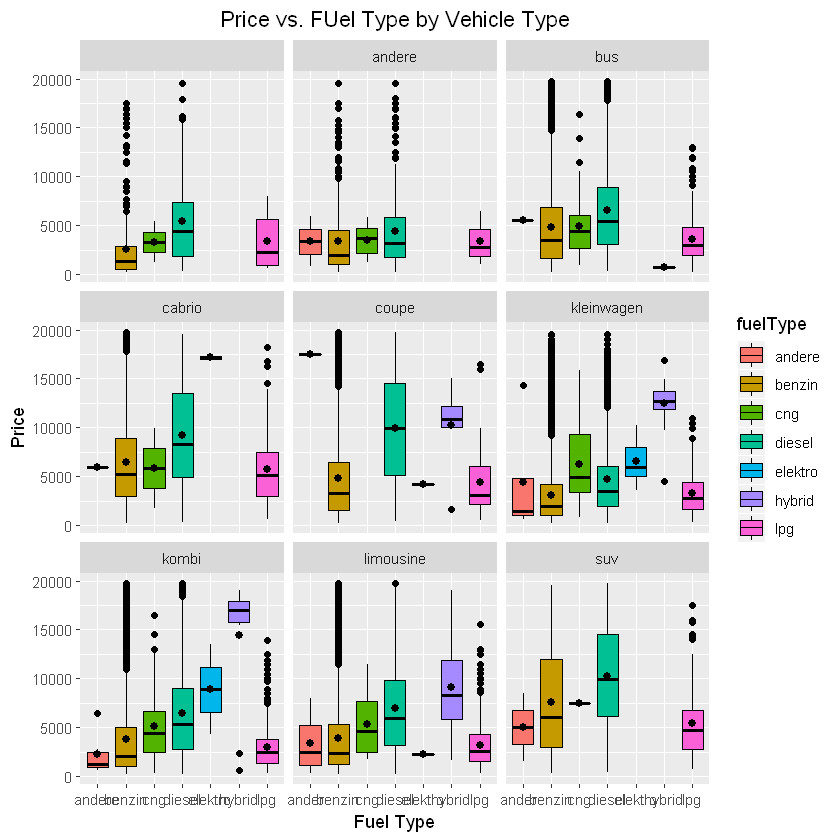

In [77]:
ggplot(aes(x = fuelType, y = price), data = subset(auto, !is.na(fuelType))) +
    geom_boxplot(aes(fill = fuelType), color = "black") +
    stat_summary(fun.y = mean, geom = "point", size = 2) +
    labs(x = "Fuel Type", y = "Price", title = "Price vs. FUel Type by Vehicle Type") +
    theme(plot.title = element_text(hjust = 0.5)) +
    facet_wrap(~vehicleType)

# Selling Time Price Analysis

The price of the cars is slightly related with the selling time between 10-20 days. This trend is especially observable in SUV vehicles.

In [78]:
auto.seltime_by_price  <- 
    group_by(sellingTime, vehicleType, .data = auto) %>% 
        summarise(price_mean = mean(price),
                price_median = median(price),
                count = n())
summary(auto.seltime_by_price)                       

  sellingTime        vehicleType    price_mean     price_median    
 Min.   : 0.00   bus       : 37   Min.   : 1392   Min.   :  874.5  
 1st Qu.: 8.00   kleinwagen: 37   1st Qu.: 3996   1st Qu.: 2796.1  
 Median :17.00   kombi     : 37   Median : 5722   Median : 4200.0  
 Mean   :17.13   limousine : 37   Mean   : 5677   Mean   : 4556.3  
 3rd Qu.:26.00   andere    : 36   3rd Qu.: 6681   3rd Qu.: 5587.4  
 Max.   :35.00   cabrio    : 36   Max.   :12200   Max.   :12325.0  
 NA's   :9       (Other)   :106                                    
     count        
 Min.   :   1.00  
 1st Qu.:  31.25  
 Median : 131.00  
 Mean   : 345.48  
 3rd Qu.: 399.00  
 Max.   :4246.00  
                  

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 47 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 47 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 47 rows containing non-finite values (stat_smooth)."

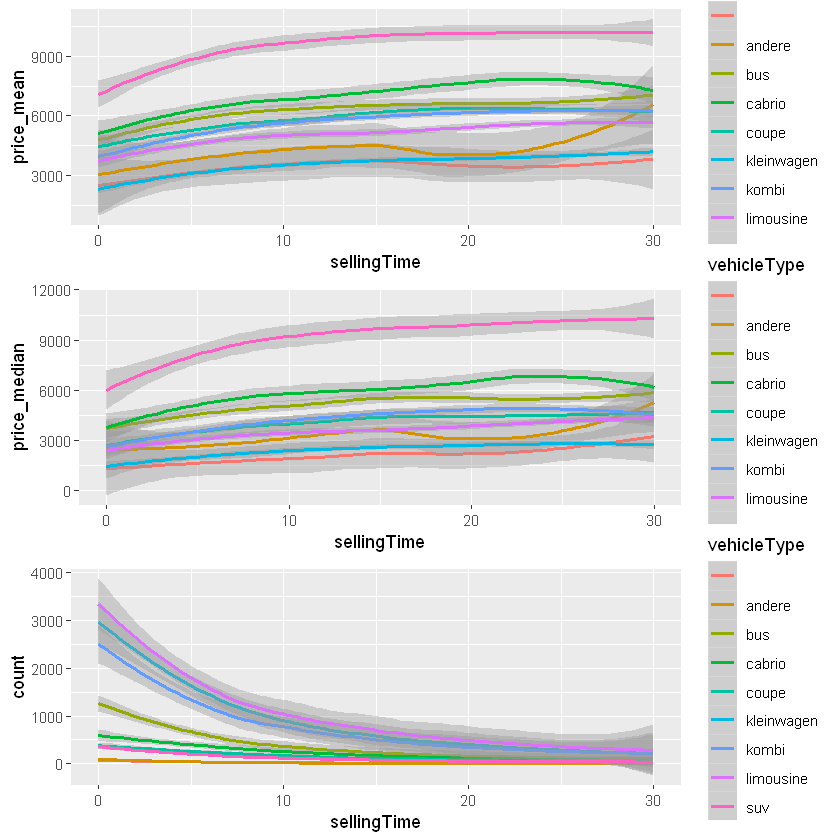

In [79]:
p1 <- ggplot(auto.seltime_by_price) + geom_smooth(aes(x=sellingTime, y=price_mean, color=vehicleType)) + xlim(0,30)
p2 <- ggplot(auto.seltime_by_price) + geom_smooth(aes(x=sellingTime, y=price_median, color=vehicleType)) + xlim(0,30)
p3 <- ggplot(auto.seltime_by_price) + geom_smooth(aes(x=sellingTime, y=count, color=vehicleType)) + xlim(0,30)
grid.arrange(p1, p2, p3, ncol = 1)

# Top 10 Brands

In top 10 Brands has been concluded brands correspodning to nearly 80% of the seoncond-hand cars

In [80]:
d2 <- auto %>%
    count(brand) %>%
    top_n(10) %>%
    arrange(n, brand) %>%
    mutate(brand = factor(brand, levels = unique(brand)))
as.character(d2$brand)

Selecting by n


[1] "seat"          "fiat"          "peugeot"       "renault"      
 [5] "ford"          "audi"          "mercedes_benz" "bmw"          
 [9] "opel"          "volkswagen"

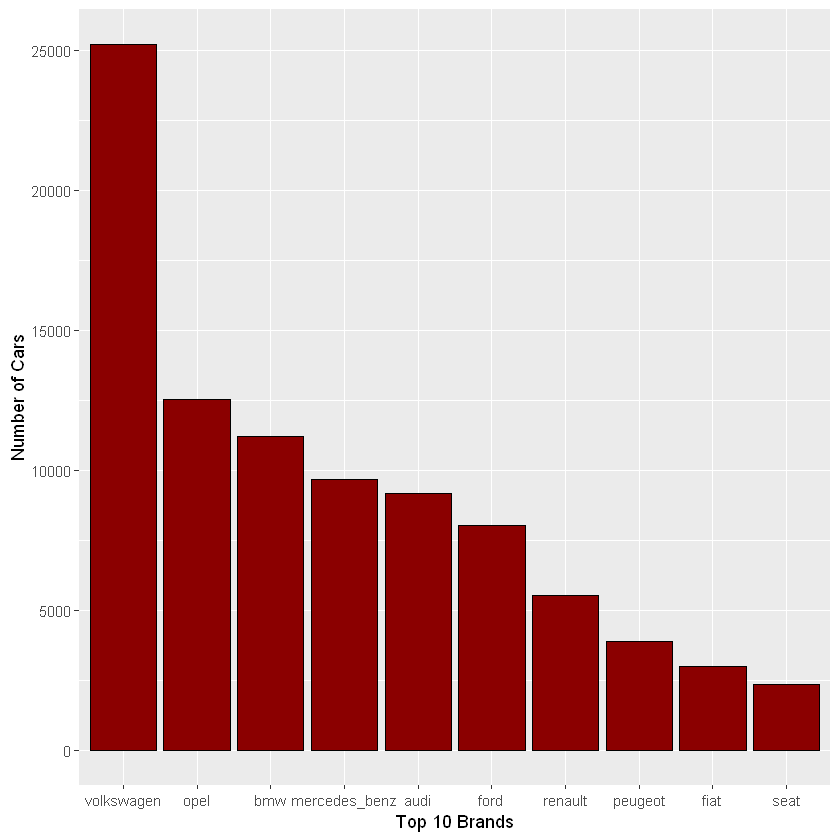

In [81]:
auto_subbrand  <- subset(auto, brand %in% c(as.character(d2$brand)))
ggplot(auto_subbrand, aes(x = reorder(brand, -table(brand)[brand]))) +
    geom_bar(color = 'black', fill ='darkred') +
    labs(x = 'Top 10 Brands', y = 'Number of Cars', ggtitle = 'Top 10 Brands Frequency Diagram')